# Visualize a Dataset with Graphs
This script basically used for
1. Get the spikes and downfalls in any particular event.
2. To find the difference between two or more events.

### Imports

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn

pd.set_option("display.max_rows", None, "display.max_columns", None)
plt.rcParams['figure.figsize'] = [16,12]   # Change matplot graph size
plt.rcParams.update({'font.size':18})      # Change matplot font size

### Define Main method()

In [2]:
def visualizeDataset(datasetFilePath):
  df = pd.read_csv(datasetFilePath)
  print("\n")
  print(datasetFilePath)
  print("===========================================")
  print("Shape of Dataset: ", df.shape)
  TS = df.iloc[:,0]
  X = df.iloc[:,1]
  Y = df.iloc[:,2]
  Z = df.iloc[:,3]
  print("Dataset snapshot:\n", df.head())

  # TSV axis data
  tsv_square = df['X']*df['X'] + df['Y']*df['Y'] + df['Z']*df['Z']
  tsv = []
  for i in tsv_square:
    tsv.append(math.sqrt(i))

  # Plot Dataset
  print("\nData Visialization:")
  fig,axs = plt.subplots(3,1)

  plt.sca(axs[0])
  plt.plot(TS,X,color='r',label='X')
  plt.legend()
  axs[0].set_xlabel('Time')
  axs[0].set_ylabel('X')

  plt.sca(axs[1])
  plt.plot(TS,Y,color='g',label='Y')
  plt.legend()
  axs[1].set_xlabel('Time')
  axs[1].set_ylabel('Y')

  plt.sca(axs[2])
  plt.plot(TS,Z,color='c',label='Z')
  plt.legend()
  axs[2].set_xlabel('Time')
  axs[2].set_ylabel('Z')

  plt.show()
  #plt.savefig('xyz.png')

  fig,axs = plt.subplots(2,1)

  plt.sca(axs[0])
  plt.plot(TS,X,color='r',label='X')
  plt.plot(TS,Y,color='g',label='Y')
  plt.plot(TS,Z,color='c',label='Z')
  plt.legend()
  axs[0].set_xlabel('Time')
  axs[0].set_ylabel('Acc')

  plt.sca(axs[1])
  plt.plot(TS,tsv,color='#000',label='TSV')
  plt.legend()
  axs[1].set_xlabel('Time')
  axs[1].set_ylabel('TSV')

  plt.show()
  #plt.savefig("tsv.png")

  print("Max TSV:", max(tsv))
  print("Min TSV:", min(tsv))

  extram_force_applied = 0
  free_fall_count = 0
  for i in tsv:
    if(i<1):
      free_fall_count += 1 
    if(i>25):
      extram_force_applied += 1
 
  print("Count of:")
  print("\tTSV:", len(tsv))
  print("\tForce:",extram_force_applied)
  print("\tFreeFall:",free_fall_count)
  return [len(tsv), max(tsv), min(tsv), extram_force_applied, free_fall_count]

### Visualize your datasets
1. Upload your `.csv` file into **Files**. *(in the lefthand side)*   
2. Then provide the file path into the `visualizeDataset()`method like below.
```
visualizeDataset('path_if_any/you_file_name.csv')
``` 



sample_data/DSXXXX_2017_11_06_09_19_11  - preimpact.csv
Shape of Dataset:  (256, 4)
Dataset snapshot:
            TS         X         Y          Z
0  1822839552 -0.307068  0.537369  10.210007
1  1832910336 -0.383835  0.537369  10.210007
2  1842981376 -0.230301  0.460602  10.133240
3  1853052160 -0.460602  0.537369  10.133240
4  1863092224 -0.383835  0.690903  10.133240

Data Visialization:


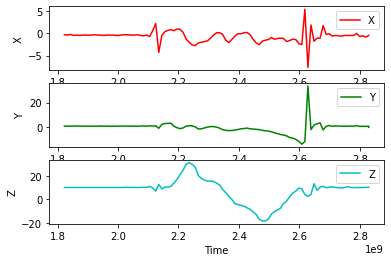

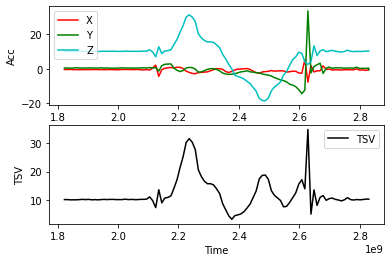

Max TSV: 34.6623911360099
Min TSV: 3.3672620691153297
Count of:
	TSV: 256
	Force: 6
	FreeFall: 0


[256, 34.6623911360099, 3.3672620691153297, 6, 0]

In [3]:
visualizeDataset('sample_data/DSXXXX_2017_11_06_09_19_11  - preimpact.csv')
#visualizeDataset('your_file_name.csv')